In [111]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd
import itertools
import numpy as np
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
from matplotlib.lines import Line2D
from matplotlib.markers import MarkerStyle
import matplotlib.ticker as ticker
# import matplotlib

import pylab as pylt
import matplotlib
from google.colab import files

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Get the path to the CSV file
csv_file_path = '/content/drive/My Drive/python data upload/th/penta/data2idvg_vds_40.csv'

# Read the CSV file into a Pandas DataFrame
dexp = pd.read_csv(csv_file_path)
dexp =dexp.loc[::-1, :] # reverse row order
dexp.reset_index(inplace = True, drop = True) # reset index

# csv_file_path2 = '/content/drive/My Drive/python data upload/th/penta/data2idvd_exp.csv'
# dsim= pd.read_csv(csv_file_path2)
# # dsim =dsim.loc[::-1, :] # reverse row order
# dsim.reset_index(inplace = True, drop = True) # reset index
# # print(dexp,dsim)


clrpath = '/content/drive/MyDrive/python data upload/clrs/allcrls.csv'
aclrs= pd.read_csv(clrpath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
dexp = dexp.sort_values('x')
# dsim = dsim.sort_values('x')


#inter polataion by single

def interpolate_dataframe(xint, data):
    x = data['x'].values
    y = data['Curve1'].values

    # Spline interpolation
    spl = splrep(x, y)
    yint = splev(xint, spl)

    # Create a new DataFrame with interpolated values
    data_interp = pd.DataFrame({'x': xint, 'Curve1': yint})

    return data_interp

xinte = np.linspace(int(dexp['x'].values.max()), int(dexp['x'].values.min()), (1+(abs(int(dexp['x'].values.max())+abs(int(dexp['x'].values.min()))))))
# xints = np.linspace(int(dsim['x'].values.min()), int(dsim['x'].values.min()), (int(dsim['x'].values.min()+abs(int(dexp['x'].values.min()))))

dexpn = interpolate_dataframe(xinte, dexp)
# dsimn = interpolate_dataframe(xints, dsim)

In [113]:
dexp=pd.DataFrame(dexpn)
dsim=pd.DataFrame(dexp)


In [114]:
# print(dexp)
# aclrs

       x        Curve1
0   13.0  1.495800e-11
1   12.0  1.811800e-10
2   11.0  1.537300e-09
3   10.0  9.381000e-09
4    9.0  4.006000e-08
5    8.0  1.130700e-07
6    7.0  2.357000e-07
7    6.0  4.149000e-07
8    5.0  6.623000e-07
9    4.0  9.901000e-07
10   3.0  1.410100e-06
11   2.0  1.932600e-06
12   1.0  2.567000e-06
13   0.0  3.319000e-06
14  -1.0  4.197000e-06
15  -2.0  5.206000e-06
16  -3.0  6.353000e-06
17  -4.0  7.641000e-06
18  -5.0  9.072000e-06
19  -6.0  1.064800e-05
20  -7.0  1.236800e-05
21  -8.0  1.422800e-05
22  -9.0  1.622500e-05
23 -10.0  1.835300e-05
24 -11.0  2.060000e-05
25 -12.0  2.296000e-05
26 -13.0  2.541000e-05
27 -14.0  2.796000e-05
28 -15.0  3.059000e-05
29 -16.0  3.328000e-05
30 -17.0  3.604000e-05
31 -18.0  3.885000e-05
32 -19.0  4.171000e-05
33 -20.0  4.461000e-05
34 -21.0  4.754000e-05
35 -22.0  5.051000e-05
36 -23.0  5.350000e-05
37 -24.0  5.653000e-05
38 -25.0  5.960000e-05
39 -26.0  6.271000e-05
40 -27.0  6.587000e-05
41 -28.0  6.908000e-05
42 -29.0  7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

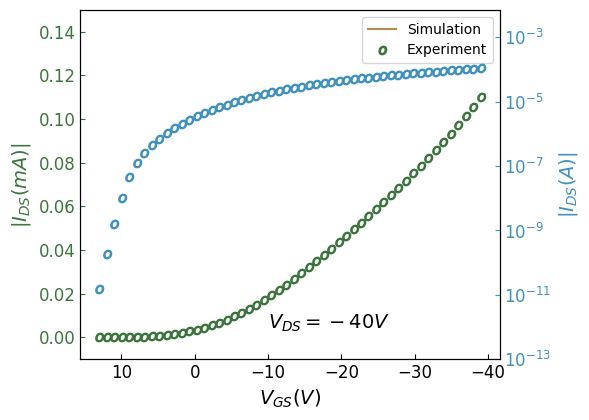

In [102]:


fig = plt.figure(figsize=(6,4.3))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

twin1 = ax.twinx()

# Set titles for the figure and the subplot respectively
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')  #title
# ax.set_title('axes title')

ax.set_xlabel('${V}_{{GS}}(V)$',fontsize=14)
ax.set_ylabel('$|I_{D S}(mA)|$',fontsize=14,)
twin1.set_ylabel('$|I_{D S}(A)|$',fontsize=14,)
# ax.tick_params(direction='in')

# colors exp and tick
clr_nlg='#3A763B'
clr_log= '#3F91C0'
# simulation
clrsnlg='#9DC033'
clrslog='#B08C4F'


#_________plot_______

# plot ax mean non log
ax.scatter(dexp['x'], abs(dexp['Curve1']),marker='$O$',c=clr_nlg,label="Experimented")
def y_axis_formatter(x, pos):
    return '{:.2f}'.format(x * 1e3)

# Set the formatter for the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_axis_formatter))

#plot log ________________________
twin1.scatter(dexp['x'], abs(dexp['Curve1']),marker='$O$',c=clr_log,label="Experimental")
# p3, = twin1.plot([], [],c=clrslog ,label="Simulated", linewidth=2.2)
twin1.set_yscale("log")

twin1.set_ylim(1e-13, 7e-3)
ax.set_ylim(-1e-5, 1.5e-4)
ax.invert_xaxis()
#plt.yscale("log")
# ax.invert_yaxis()

# ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),arrowprops=dict(facecolor='black', shrink=0.05)) # arrow
# ax.rcParams["font.weight"] = "bold"

# legent _____________
# ax.legend(labelcolor='linecolor')
# ax.legend(loc=5)
# ax.legend(loc=(0.1,0.8))
handles = [Line2D([], [], linestyle='-', color= clrslog, label='Line'),
           Line2D([], [], linestyle='None', marker=MarkerStyle('$o$'), color=clr_nlg, label='Marker')]
labels =['Simulation', 'Experiment']
ax.legend(handles, labels)

l_sz=12  #lable text size
fig.bottom : 0.15
ax.tick_params(axis='y', direction='in', colors=clr_nlg,labelsize=l_sz)
ax.tick_params(axis='x', direction='in', colors='black',labelsize=l_sz)
twin1.tick_params(which='minor',axis='y', direction='in', colors=clr_log)
twin1.tick_params(axis='y', direction='in', colors=clr_log, labelsize=l_sz)
ax.yaxis.label.set_color(clr_nlg)
twin1.yaxis.label.set_color(clr_log)


annotation = ax.annotate('${V}_{DS}=-40V$', xy=(-20, 1e-5), xytext=(-10, 4e-6))

# Adjust the font size of the annotation text
annotation.set_fontsize(14)

fig.set_tight_layout(True)


fig.savefig('IDVG penta data2.jpg', dpi=300)
# Download the figure

files.download('IDVG penta data2.jpg')
plt.show()

In [ ]:

# files.download('IDVG penta pvp.jpg')

In [ ]:
fig2 = plt.figure(figsize=(4.6,4))
ax = fig2.add_subplot()

#____________threshold voltage ___________
#sorting values small to large
dexp = dexp.sort_values('x')
dsim = dsim.sort_values('x')

def smooth_data(data, column):
    # Perform spline interpolation for smoothing
    spl = splrep(data['x'], data[column])
    y_smooth = splev(data['x'], spl)

    # Create a new DataFrame with smoothed data
    data_smoothed = pd.DataFrame({'x': data['x'], column + '_smoothed': y_smooth})

    return data_smoothed

# Calculate the square root of the 'Curve1' column in dexp
# dexp['SquareRoot'] = dexp['Curve1'].apply(lambda x: x ** 0.5)
# dsim['SquareRoot'] = dsim['Curve1'].apply(lambda x: x ** 0.5)

# Smooth the 'SquareRoot' data in dexp using spline interpolation
dexp_smoothed = smooth_data(dexp, 'SquareRoot')

# Smooth the 'Curve1' data in dsim using spline interpolation
dsim_smoothed = smooth_data(dsim, 'SquareRoot')

# Plot the smoothed data
ax.scatter(dexp_smoothed['x'], dexp_smoothed['SquareRoot_smoothed'], label='Experimental',marker='$O$', c=aclrs.iloc[3]['dclrs'])
# ax.scatter(dexp_smoothed['x'], dexp_smoothed['SquareRoot_smoothed'], label='Experimental',marker='$O$', c=aclrs.iloc[3]['dclrs'])
# ax.plot(dsim_smoothed['x'], dsim_smoothed['SquareRoot_smoothed'], label='Simulated',linewidth=2.2,c=aclrs.iloc[2]['fclrs'] )

#  annotation
annotation = ax.annotate('${V}_{DS}=-40V$', xy=(-20, 0.006), xytext=(-12,0.006), fontsize=12)

# ax.xlabel('X')   # axis name and title
ax.set_xlabel('${V}_{{GS}}(V)$',fontsize=12)
ax.set_ylabel('$\sqrt{|I_{D S}|(A)}$',fontsize=12)
ax.text(-35, 0.0007, 'Exp. $V_{TH}=$ \nSim. $V_{TH}$=', fontsize=12)
# ax.legend()

handles = [Line2D([], [], linestyle='-', color= clr_nlg, label='Line'),
           Line2D([], [], linestyle='None', marker=MarkerStyle('$o$'), color= clrslog, label='Marker')]
labels =['Simulation', 'Experiment']
ax.legend(handles, labels)

fig2.set_tight_layout(True)

# Download the figure
fig2.savefig('VTH penta data2 sqrt.png', dpi=300)
files.download('VTH penta data2 sqrt.png')


In [116]:
def performanc_para(data0):
    data=pd.DataFrame(data0)
    data['gm'] = -1 * (data['Curve1'].diff() / data['x'].diff()).fillna(0)
    data['mulin'] = -1 * data['gm'] / (50 * 1.2e-9 * (-40))
    data['sqrt_Id'] = np.sqrt(np.abs(data['Curve1']))
    data['musat'] = ((data['sqrt_Id'].diff() / data['x'].diff()).fillna(0)) ** 2 * (2 / (50 * 1.8e-9))
    data['log_Id'] = np.log10(abs(data['Curve1']))
    data['inv_SS'] = np.absolute((data['log_Id'].diff() / data['x'].diff()).fillna(0))
    data['SS'] = 1 / data['inv_SS'].max()
    data['Ion_off']= abs(data['Curve1']).max()/abs(data['Curve1']).min()

    return data

dexpcal = performanc_para(dexp)
dsimcal = performanc_para(dsim)

In [109]:
print(dexpcal,dsimcal)


            x        Curve1            gm     mulin   sqrt_Id     musat  \
0   13.000000  1.495800e-11 -0.000000e+00 -0.000000  0.000004  0.000000   
1   12.118644  1.363677e-10  1.377533e-10  0.000057  0.000012  0.001745   
2   11.237288  9.694734e-10  9.452545e-10  0.000394  0.000031  0.010832   
3   10.355932  5.008493e-09  4.582733e-09  0.001909  0.000071  0.044939   
4    9.474576  2.126370e-08  1.844340e-08  0.007685  0.000146  0.161134   
5    8.593220  6.404731e-08  4.854295e-08  0.020226  0.000253  0.329094   
6    7.711864  1.430862e-07  8.967878e-08  0.037366  0.000378  0.448369   
7    6.830508  2.618148e-07  1.347112e-07  0.056130  0.000512  0.509176   
8    5.949153  4.257290e-07  1.859796e-07  0.077492  0.000652  0.567146   
9    5.067797  6.431230e-07  2.466586e-07  0.102774  0.000802  0.639139   
10   4.186441  9.223274e-07  3.167895e-07  0.131996  0.000960  0.718051   
11   3.305085  1.271567e-06  3.962522e-07  0.165105  0.001128  0.800319   
12   2.423729  1.698012e-

In [ ]:
dsimcal[(dsimcal['x'] == -60) | (dsimcal['x'] == -10)]

,x,Curve1,SquareRoot,gm,mulin,sqrt_Id,musat,log_Id,inv_SS,SS,Ion_off
60,-60.0,4.800000e-05,0.006928,2.200000e-06,0.916667,0.006928,0.547704,-4.318759,0.019462,8.916631,1328.922495
10,-10.0,5.160000e-07,0.000718,9.400000e-08,0.039167,0.000718,0.087344,-6.287350,0.072680,8.916631,1328.922495


In [117]:
dexpcal[(dexpcal['x'] == -30) | (dexpcal['x'] == 3)]

,x,Curve1,gm,mulin,sqrt_Id,musat,log_Id,inv_SS,SS,Ion_off
10,3.0,0.000001,4.200000e-07,0.175000,0.001187,0.822947,-5.850750,0.153571,0.923159,7.356598e+06
43,-30.0,0.000076,3.340000e-06,1.391667,0.008701,0.837275,-4.120904,0.019597,0.923159,7.356598e+06


In [ ]:
# dexpcal.to_csv('dexpcal.csv', index=False)

# dsimcal.to_csv('dsimcal.csv', index=False)
# files.download('dexpcal.csv',)
# files.download('dsimcal.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
litclrs

In [ ]:
import matplotlib.ticker as ticker